#### Audio Classification Data Preprocessing

In [2]:
### Let's read a sample audio using librosa
import librosa


In [69]:
print(librosa_audio_data)

[ 0.00330576  0.00468387  0.00360455 ... -0.0037562  -0.00348641
 -0.00356705]


In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 


#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav


In [72]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

In [5]:
import matplotlib.pyplot as plt



### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio 
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [75]:
mfccs

array([[-4.45197296e+02, -4.47219299e+02, -4.49755127e+02, ...,
        -4.77412781e+02, -4.74241730e+02, -4.82704987e+02],
       [ 1.12513969e+02,  1.11970383e+02,  1.12244164e+02, ...,
         1.12045395e+02,  1.12248581e+02,  1.05560913e+02],
       [-1.58260956e+01, -2.30021858e+01, -3.12500191e+01, ...,
        -9.15441895e+00, -1.03232269e+01, -7.39410734e+00],
       ...,
       [-7.82766485e+00, -5.03880405e+00, -4.48165369e+00, ...,
        -1.90692782e-01,  4.34143972e+00,  1.00339069e+01],
       [-1.91763425e+00, -8.02737713e-01, -1.20930457e+00, ...,
        -1.23640239e-01,  2.90504694e-02,  9.22017097e-01],
       [-3.88130605e-01,  3.09317827e-01,  6.72155714e+00, ...,
        -2.33736587e+00, -4.25179911e+00, -2.31322765e+00]], dtype=float32)

In [7]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [9]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [02:50, 21.10it/s]/Users/rishiraj/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [06:36, 26.22it/s]/Users/rishiraj/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/rishiraj/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [06:54, 21.08it/s]


In [10]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [11]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [12]:
X.shape

(8732, 40)

In [13]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [14]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [15]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641211e-01,  7.33490884e-01,  7.11009264e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [18]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
X_train.shape

(6985, 40)

In [20]:
X_test.shape

(1747, 40)

In [21]:
y_train.shape

(6985, 10)

In [22]:
y_test.shape

(1747, 10)

### Model Creation

In [23]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [25]:
### No of classes
num_labels=y.shape[1]

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

# Assuming X_train, X_test, y_train, y_test are properly formatted

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=50, max_value=200, step=50), input_shape=(40,)))
    model.add(Activation(hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units_2', min_value=100, max_value=300, step=100)))
    model.add(Activation(hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=hp.Int('units_3', min_value=50, max_value=200, step=50)))
    model.add(Activation(hp.Choice('activation_3', values=['relu', 'tanh', 'sigmoid'])))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(num_labels))
    model.add(Activation('softmax'))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Set up tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # number of hyperparameter combinations to try
    executions_per_trial=1,
    directory='my_dir',
    project_name='audio_classification')

# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Perform hyperparameter tuning with early stopping
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters: {best_hps}")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model on the full dataset with early stopping
best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])


Trial 5 Complete [00h 00m 15s]
val_accuracy: 0.8277046084403992

Best val_accuracy So Far: 0.8414424657821655
Total elapsed time: 00h 06m 40s
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x291067250>
Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 1.9185 - accuracy: 0.3042 - val_loss: 1.5669 - val_accuracy: 0.4774
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 1.5094 - accuracy: 0.4786 - val_loss: 1.3955 - val_accuracy: 0.4997
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 1.3630 - accuracy: 0.5376 - val_loss: 1.1929 - val_accuracy: 0.6090
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 1.2639 - accuracy: 0.5702 - val_loss: 1.0957 - val_accuracy: 0.6302
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 1.1905 - accuracy: 0.5963 - val_loss: 1.0369 - val_accuracy: 0.6835
Epoch 6/100
219/219 [=====

219/219 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.8412 - val_loss: 0.4266 - val_accuracy: 0.8632


In [48]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hps.values)

Best Hyperparameters:
{'units_1': 200, 'activation_1': 'tanh', 'dropout_1': 0.4, 'units_2': 200, 'activation_2': 'sigmoid', 'dropout_2': 0.2, 'units_3': 150, 'activation_3': 'tanh', 'dropout_3': 0.4, 'optimizer': 'rmsprop'}


Epoch 1/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8518 - val_loss: 0.3900 - val_accuracy: 0.8729
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8547 - val_loss: 0.3886 - val_accuracy: 0.8746
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8621 - val_loss: 0.4070 - val_accuracy: 0.8666
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8628 - val_loss: 0.3826 - val_accuracy: 0.8724
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8578 - val_loss: 0.3859 - val_accuracy: 0.8821
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8651 - val_loss: 0.3911 - val_accuracy: 0.8752
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8560 - val_loss: 0.3870 - val_accuracy: 0.8718

Epoch 58/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8893 - val_loss: 0.3670 - val_accuracy: 0.8844
Epoch 59/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.8876 - val_loss: 0.3441 - val_accuracy: 0.8924
Epoch 60/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8842 - val_loss: 0.3433 - val_accuracy: 0.8993
Epoch 61/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8895 - val_loss: 0.3484 - val_accuracy: 0.8930
Epoch 62/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8892 - val_loss: 0.3426 - val_accuracy: 0.8930
Epoch 63/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8863 - val_loss: 0.3440 - val_accuracy: 0.8970
Epoch 64/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8922 - val_loss: 0.3387 - val_accuracy:

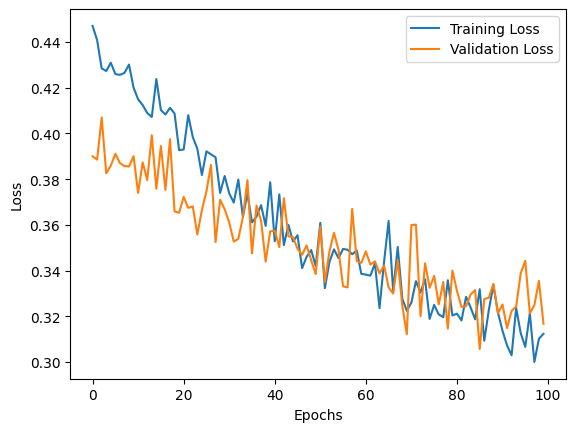

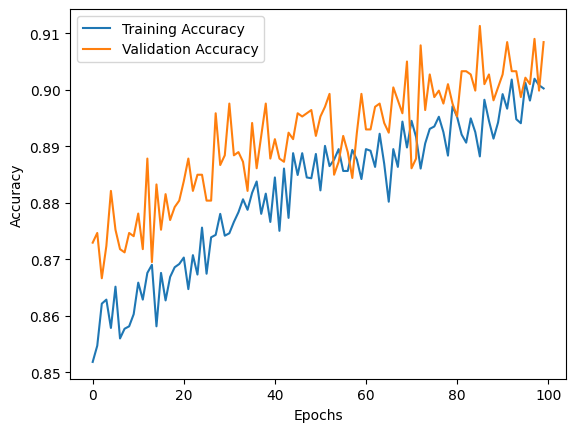

In [58]:
history = best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))



plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
test_accuracy=best_model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy)

[0.3167053461074829, 0.9084144234657288]


### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [61]:
filename="/Users/rishiraj/Deep Learning/Projects/Audio Classificaiton/UrbanSound8K/audio/fold7/14772-7-2-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predictions = np.argmax(best_model.predict(mfccs_scaled_features),axis=1)
print(predictions)
prediction_class = labelencoder.inverse_transform(predictions) 
prediction_class

[-11.338845    50.589233   -14.992685    16.671083   -25.329138
   6.784687   -36.16954     -0.7057618  -31.532421    -2.5662675
 -22.442356    -1.8718861  -32.35088    -11.168748   -35.69838
  -3.9627578  -19.775549     1.4320754  -23.02296     -2.0574632
 -14.900823     2.5987754  -14.6283455    4.0907564  -11.838689
   3.1228497   -6.976018    -1.2451633   -4.3162646   -1.1654692
  -2.5880518   -0.3249269   -7.196415     2.557967    -8.433434
   4.270383    -5.0151606    0.57794625  -0.8818482    2.9407227 ]
[[-11.338845    50.589233   -14.992685    16.671083   -25.329138
    6.784687   -36.16954     -0.7057618  -31.532421    -2.5662675
  -22.442356    -1.8718861  -32.35088    -11.168748   -35.69838
   -3.9627578  -19.775549     1.4320754  -23.02296     -2.0574632
  -14.900823     2.5987754  -14.6283455    4.0907564  -11.838689
    3.1228497   -6.976018    -1.2451633   -4.3162646   -1.1654692
   -2.5880518   -0.3249269   -7.196415     2.557967    -8.433434
    4.270383    -5.0151606

array(['jackhammer'], dtype='<U16')